In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')



In [16]:
# Convert Date columns to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Feature Engineering: Extracting useful numerical features from dates if necessary
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Check for missing values
print(df.info())

# Handle missing values (if necessary)
df.fillna(method='ffill', inplace=True)

# Convert categorical columns to numerical representations
df_encoded = pd.get_dummies(df, columns=['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 
                                          'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'], drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1424\3924573528.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [17]:
# Select features and target
X = df_encoded.drop(['Billing Amount'], axis=1)
y = df_encoded['Billing Amount']

# Check data types of features
print(X.dtypes)

# Ensure all features are numeric
X = X.select_dtypes(include=['int64', 'float64'])


Name                                 object
Age                                   int64
Date of Admission            datetime64[ns]
Room Number                           int64
Discharge Date               datetime64[ns]
                                  ...      
Medication_Lipitor                     bool
Medication_Paracetamol                 bool
Medication_Penicillin                  bool
Test Results_Inconclusive              bool
Test Results_Normal                    bool
Length: 80246, dtype: object


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [19]:
# Predict anomalies
df['Anomaly'] = model.predict(X)

# Anomalies are labeled as -1
anomalies = df[df['Anomaly'] == -1]


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


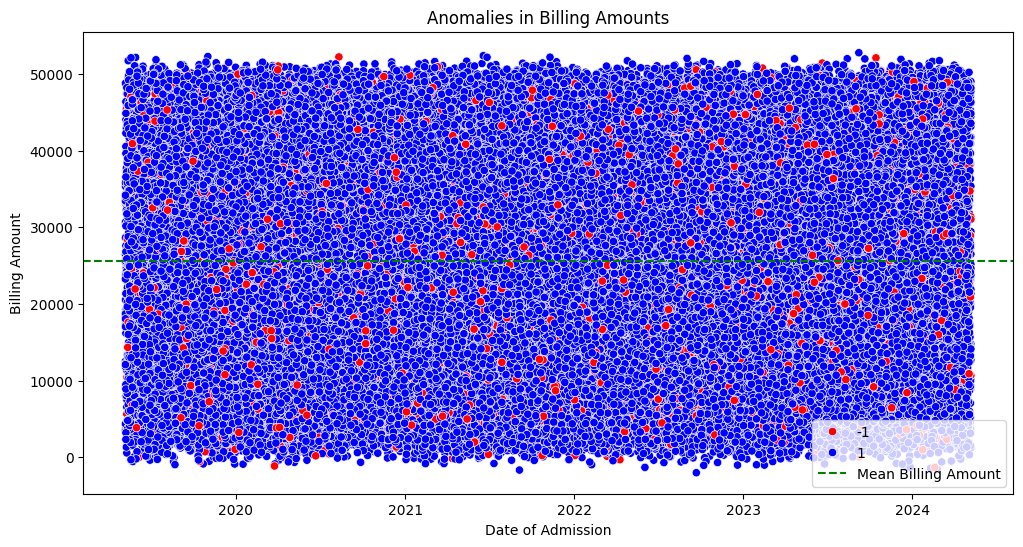

In [20]:
# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date of Admission', y='Billing Amount', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomalies in Billing Amounts')
plt.xlabel('Date of Admission')
plt.ylabel('Billing Amount')
plt.axhline(y=df['Billing Amount'].mean(), color='green', linestyle='--', label='Mean Billing Amount')
plt.legend()
plt.show()

In [21]:
# Save anomaly records to a CSV file
anomalies.to_csv('anomalies.csv')
